Here, I'm just playing around with stuff we did in 1001. You can see model performances below.

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aquail/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
train = pd.read_csv('train.csv')
dev = pd.read_csv('dev.csv')
test = pd.read_csv('test_no_label.csv').drop('label', axis = 1)

In [3]:
X_train = train.drop('label', axis = 1)
y_train = train['label']
X_dev = dev.drop('label', axis = 1)
y_dev = dev['label']

In [4]:
train_corpus = X_train['review']
dev_corpus = X_dev['review']

In [40]:
tv = TfidfVectorizer(binary = False, ngram_range = (1,2), stop_words = 'english', max_features=2000)
cv = CountVectorizer(binary = True, ngram_range = (1,2), stop_words = 'english', max_features=2000)

In [41]:
x_cv = cv.fit_transform(train_corpus)
x_tv = tv.fit_transform(train_corpus)

In [42]:
start = datetime.now()
bnb_cv = BernoulliNB().fit(x_cv,y_train).predict_proba(cv.transform(dev_corpus))
bnb_tv = BernoulliNB().fit(x_tv,y_train).predict_proba(tv.transform(dev_corpus))

lr_cv = LR(solver = 'liblinear').fit(x_cv,y_train).predict_proba(cv.transform(dev_corpus))
lr_tv = LR(solver = 'liblinear').fit(x_tv,y_train).predict_proba(tv.transform(dev_corpus))

# svm_cv = SVC(kernel = 'linear', probability=True).fit(x_cv, y_train).predict_proba(cv.transform(dev_corpus))
# sv_tv = SVC(kernel = 'linear', probability=True).fit(x_tv, y_train).predict_proba(tv.transform(dev_corpus))

end = datetime.now()
print(end-start)

0:00:41.882217


In [43]:
fpr_bnb_cv, tpr_bnb_cv, thresholds_bnb_cv = metrics.roc_curve(y_dev, bnb_cv[:,1])
fpr_bnb_tv, tpr_bnb_tv, thresholds_bnb_tv = metrics.roc_curve(y_dev, bnb_tv[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = metrics.roc_curve(y_dev, lr_cv[:,1])
fpr_lr_tv, tpr_lr_tv, thresholds_lr_tv = metrics.roc_curve(y_dev, lr_tv[:,1])
# fpr_svm_cv, tpr_svm_cv, thresholds_svm_cv = metrics.roc_curve(y_dev, svm_cv[:,1])
# fpr_svm_tv, tpr_svm_tv, thresholds_svm_tv = metrics.roc_curve(y_dev, svm_tv[:,1])

roc_auc_bnb_cv = metrics.auc(fpr_bnb_cv, tpr_bnb_cv)
roc_auc_bnb_tv = metrics.auc(fpr_bnb_tv, tpr_bnb_tv)
roc_auc_lr_cv = metrics.auc(fpr_lr_cv, tpr_lr_cv)
roc_auc_lr_tv = metrics.auc(fpr_lr_tv, tpr_lr_tv)
# roc_auc_svm_cv = metrics.auc(fpr_svm_cv, tpr_svm_cv)
# roc_auc_svm_tv = metrics.auc(fpr_svm_tv, tpr_svm_tv)

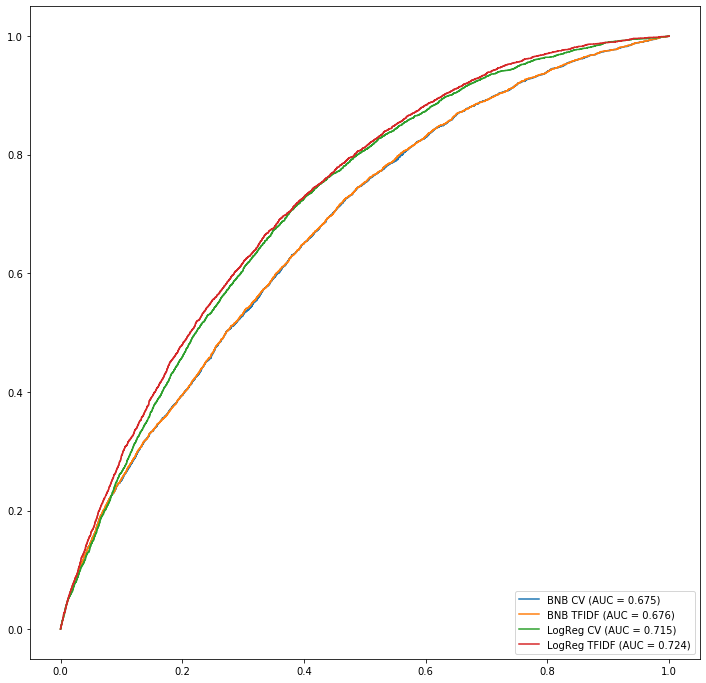

In [44]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

plt.plot(fpr_bnb_cv, tpr_bnb_cv, label = 'BNB CV (AUC = %0.3f)' % roc_auc_bnb_cv)
plt.plot(fpr_bnb_tv, tpr_bnb_tv, label = 'BNB TFIDF (AUC = %0.3f)' % roc_auc_bnb_tv)
plt.plot(fpr_lr_cv, tpr_lr_cv, label = 'LogReg CV (AUC = %0.3f)' % roc_auc_lr_cv)
plt.plot(fpr_lr_tv, tpr_lr_tv, label = 'LogReg TFIDF (AUC = %0.3f)' % roc_auc_lr_tv)
# plt.plot(fpr_svm_cv, tpr_svm_cv, label = 'SVM CV (AUC = %0.3f)' % roc_auc_svm_cv)
# plt.plot(fpr_svm_tv, tpr_svm_tv, label = 'SVM TFIDF (AUC = %0.3f)' % roc_auc_svm_tv)
plt.legend(loc="lower right")
plt.show()

In [37]:
def preprocess_data(data):
    # This function should return a list of lists of preprocessed tokens for each message   
    preprocessed_data = []
    stop_words = stopwords.words('english')

    for text in data:
        tokenizer = RegexpTokenizer(r'\w+')
        tokenized_text = tokenizer.tokenize(text)
        
        words = []
        
        for word in tokenized_text:
            if word not in stop_words:
                words.append(word)
    
        preprocessed_data.append(words)
        
    return preprocessed_data

In [38]:
x = preprocess_data(train_corpus)

In [39]:
x

[['The',
  'food',
  'snack',
  'selection',
  'popular',
  'Greek',
  'dishes',
  'The',
  'appetizer',
  'tray',
  'good',
  'Greek',
  'salad',
  'We',
  'underwhelmed',
  'main',
  'courses',
  'There',
  '4',
  '5',
  'tables',
  'sometimes',
  'hard',
  'get',
  'seated'],
 ['This',
  'little',
  'place',
  'Soho',
  'wonderful',
  'I',
  'lamb',
  'sandwich',
  'glass',
  'wine',
  'The',
  'price',
  'shocked',
  'small',
  'serving',
  'Soho',
  'The',
  'staff',
  'little',
  'snotty',
  'rude',
  'food',
  'great',
  'expect',
  'world',
  'class',
  'service'],
 ['ordered',
  'lunch',
  '15',
  'Snack',
  'last',
  'Friday',
  'On',
  'time',
  'nothing',
  'missing',
  'food',
  'great',
  'I',
  'added',
  'regular',
  'company',
  'lunch',
  'list',
  'everyone',
  'enjoyed',
  'meal'],
 ['This',
  'beautiful',
  'quaint',
  'little',
  'restaurant',
  'pretty',
  'street',
  'If',
  'strolling',
  'soho',
  'around',
  'lunchtime',
  'would',
  'great',
  'place',
  'st

Creating vocab from top 2000 words based on total frequency. Stop words not removed, this needs to be done.

In [11]:
vocab = dict()
for j in train_corpus:
    x = j.replace('.', '').split(' ')
    if word not in stop_words:
                words.append(word)
    for i in x:
        if i in vocab:
            vocab[i] +=1
        else:
            vocab[i] = 1

In [27]:
# Order so I can get top 2000 items
ordered_vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1], reverse=True)}

In [28]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [29]:
len(ordered_vocab)

455437

In [32]:
top_2000 = take(2000, ordered_vocab)

In [35]:
len(top_2000), type(top_2000)

(2000, list)